In [1]:
# Importing the required modules

In [2]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [5]:
# Obtaining data specific to Anantapur

In [6]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,4.10,192.0,7280.0,878.0,58.30,0.43,2.71,13.79,1.04,7.36,0.625925,0.434195,1.698753,2.700348,-0.574500,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,5.46,212.0,9156.0,1006.0,4.54,0.40,0.93,13.81,1.29,19.02,0.625925,0.434195,1.698753,2.700348,-0.574500,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,9.21,299.0,8995.0,1454.0,13.67,0.40,1.14,13.79,1.27,25.99,0.515956,0.315495,1.404520,1.939759,-0.492355,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,4.11,196.0,7970.0,1164.0,3.45,0.44,1.02,12.29,1.03,8.57,0.449421,0.259634,1.428429,1.551268,-0.436821,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,4.27,200.0,8759.0,1283.0,3.18,0.38,1.16,10.87,1.12,18.94,0.625925,0.434195,1.698753,2.700348,-0.574500,Jowar


In [7]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'NDVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.00000,419.000000
mean,8.078878,0.503532,0.340931,13.386945,147.482100,4108.384248,609.341289,37.721599,0.590931,1.223532,8.589714,1.034702,10.83031,0.168321
std,0.814803,1.165338,0.135438,12.331398,129.432554,3182.061509,535.419100,162.388020,0.592986,1.359873,5.699854,0.537233,5.70459,0.183312
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.40000,-0.083797
25%,7.640000,0.180000,0.260000,4.680000,92.000000,995.000000,201.500000,5.160000,0.320000,0.485000,4.870000,0.680000,6.55500,0.023612
50%,8.300000,0.280000,0.330000,9.350000,133.000000,3474.000000,480.000000,8.450000,0.400000,0.860000,7.320000,0.950000,9.74000,0.097804
75%,8.680000,0.400000,0.410000,19.265000,181.000000,7279.000000,941.000000,18.085000,0.615000,1.400000,10.830000,1.210000,13.60500,0.315495
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.17000,0.592273


In [8]:
# Analysis of SoilType

In [9]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [10]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [11]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Black Soil': 152, 'Red Soil': 156}

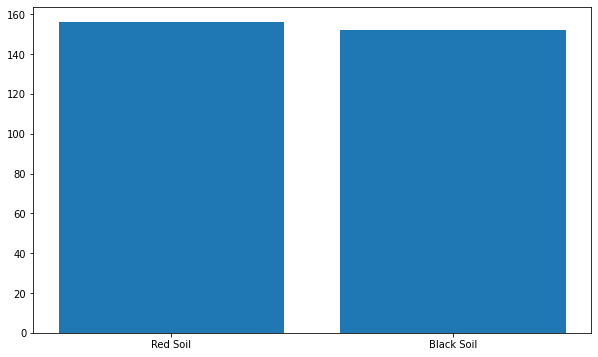

In [12]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [13]:
# Analysis of Crops grown 

In [14]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [15]:
df['Crop'].value_counts()

Cotton                  82
Groundnut               43
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Ground Nut               9
Paddy                    9
Jonna                    8
Coriandam                8
Vari                     7
GroundNut                7
Mahendra Jonna           6
Sunflower                6
Ground Nat               5
Dhanyalu                 5
Cottan,Ground Nat        5
Blackgram                4
cotton                   4
ground nut/groundnut     4
Redgram                  4
Chickpea                 3
Groundnut,Cottan         2
Paddy,jowar              2
Ground nut,castor        2
Pacha Jonna              2
Clastor                  2
Ground Nut,jowar         2
Cotton,Ground Nut        2
Ground nut ,Mirchi       1
Oniyan,Ground Nat        1
Ground nut,Cottan        1
JOWAR                    1
Cottan,Castral           1
groundnut                1
Ground Nut, Cotton       1
Castor                   1
M

GroundNut + Cotton    200
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

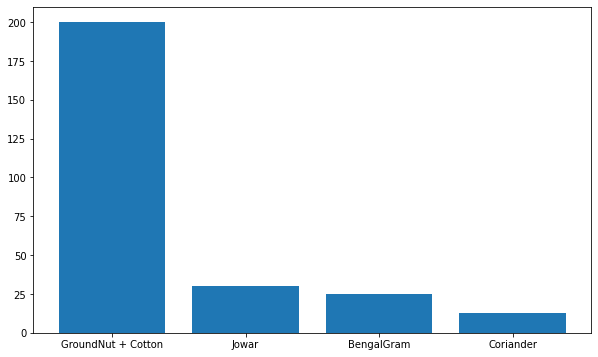

In [16]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
pH,1.000000,0.154452,0.143359,-0.396558,0.348434,0.626301,0.642893,0.074972,-0.126218,0.371529,-0.279575,0.103744,-0.426539,0.204563
EC,0.154452,1.000000,0.046686,-0.090044,0.137063,0.171919,0.156968,0.898053,-0.009671,0.760777,-0.011341,0.054006,-0.050767,0.111508
OC,0.143359,0.046686,1.000000,0.354102,0.602425,0.190425,0.240549,0.025472,0.320512,0.154228,0.095769,0.462408,0.264084,-0.007942
P,-0.396558,-0.090044,0.354102,1.000000,0.082333,-0.508645,-0.382889,-0.064294,0.469405,-0.227254,-0.046002,-0.003312,0.186107,-0.185014
K,0.348434,0.137063,0.602425,0.082333,1.000000,0.523478,0.526675,0.077524,0.152489,0.333931,0.255874,0.406623,0.190940,0.125736
Ca,0.626301,0.171919,0.190425,-0.508645,0.523478,1.000000,0.909771,0.137600,-0.178579,0.484745,0.301247,0.380660,0.003488,0.375374
Mg,0.642893,0.156968,0.240549,-0.382889,0.526675,0.909771,1.000000,0.128820,-0.058152,0.528310,0.230898,0.459196,0.021749,0.328449
S,0.074972,0.898053,0.025472,-0.064294,0.077524,0.137600,0.128820,1.000000,0.002534,0.762968,0.000587,0.048406,-0.015404,0.100844
Zn,-0.126218,-0.009671,0.320512,0.469405,0.152489,-0.178579,-0.058152,0.002534,1.000000,0.034307,-0.068955,0.273181,0.216550,-0.030288
B,0.371529,0.760777,0.154228,-0.227254,0.333931,0.484745,0.528310,0.762968,0.034307,1.000000,0.073986,0.261500,-0.028932,0.220297


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'ARVI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu      ARVI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12  0.434195
1704    Jowar
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [25]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [26]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [27]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7164179104477612


In [28]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.14 %
Standard Deviation: 4.18 %


# Decision Tree Classifier

In [29]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [31]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8208955223880597


In [32]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.14 %
Standard Deviation: 5.70 %


# Random Forest Classifier

In [33]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [35]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8208955223880597


In [36]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.62 %
Standard Deviation: 4.88 %


# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8208955223880597


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.10 %
Standard Deviation: 5.61 %


In [42]:
pickle.dump(clf4, open('Kurnool_model.pkl', 'wb'))
pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.845771144278607
Testing Accuracy:  0.7611940298507462


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.57 %
Standard Deviation: 4.56 %


# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.7011172	total: 46.8ms	remaining: 4.63s
1:	learn: 0.4949702	total: 47.8ms	remaining: 2.34s
2:	learn: 0.4668518	total: 48.5ms	remaining: 1.57s
3:	learn: 0.4068748	total: 49.2ms	remaining: 1.18s
4:	learn: 0.3830690	total: 50ms	remaining: 950ms
5:	learn: 0.3754810	total: 50.7ms	remaining: 794ms
6:	learn: 0.3480412	total: 51.4ms	remaining: 683ms
7:	learn: 0.3234594	total: 52.2ms	remaining: 600ms
8:	learn: 0.3202538	total: 52.8ms	remaining: 534ms
9:	learn: 0.3029061	total: 53.5ms	remaining: 481ms
10:	learn: 0.2957776	total: 54.2ms	remaining: 438ms
11:	learn: 0.2937234	total: 54.8ms	remaining: 402ms
12:	learn: 0.2762008	total: 55.5ms	remaining: 372ms
13:	learn: 0.2699037	total: 56.2ms	remaining: 345ms
14:	learn: 0.2647540	total: 56.9ms	remaining: 323ms
15:	learn: 0.2623205	total: 57.7ms	remaining: 303ms
16:	learn: 0.2477300	total: 58.3ms	remaining: 285ms
17:	learn: 0.2351182	total: 59ms	remaining: 269ms
18:	learn: 0.2326741	total: 59.7ms	remaining: 255ms
19:	learn: 0.2308689	total

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5685231265
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5692877593
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5730670976
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5208175943
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5678573136
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.2744547	total: 4ms	remaining: 1.33s
3:	learn: 1.2486166	total: 5.12ms	remaining: 1.27s
4:	learn: 1.2153425	total: 6.14ms	remaining: 1.22s
5:	learn: 1.1832865	total: 8.04ms	remaining: 1.33s
6:	learn: 1.1584337	total: 9.36ms	remaining: 1.33s
7:	learn: 1.1344397	total: 10.6ms	remaining: 1.31s
8:	learn: 1.1076780	total: 11.8ms	remaining: 1.3s
9:	learn: 1.0877384	total: 13.1ms	remaining: 1.3s
10:	learn: 1.0689908	total: 14.4ms	remaining: 1.29s
11:	learn: 1.0451097	total: 15.7ms	remaining: 1.29s
12:	learn: 1.0250356	total: 16.9ms	remaining: 1.28s
13:	learn: 1.0049562	total: 18.1ms	remaining: 1.27s
14:	learn: 0.9849646	total: 19.3ms	remaining: 1.27s
15:	learn: 0.9676292	total: 20.5ms	remaining: 1.26s
16:	learn: 0.9504858	total: 21.7ms	remaining: 1.26s
17:	learn: 0.9344770	total: 23ms	remaining: 1.25s
18:	learn: 0.9183641	total: 24.1ms	remaining: 1.25s
19:	learn: 0.9018945	total: 25.4ms	remaining: 1.25s
20:	learn: 0.8865672	total: 